In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import sys
import os

# Add the 'utils' folder to the module search path
utils_path = os.path.abspath(os.path.join('utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)
from utils import myutils

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [3]:
file_path = '../dati/processed/clustered_data.csv'

# Read the CSV file with the defined schema
df = pd.read_csv(file_path)

df.head(3)

,id_claim_hash,cd_dealer_hash,failure_date,vin_hash,claim_status_Z002,claim_status_Z005,claim_status_Z010,claim_status_Z011,claim_status_Z012,claim_status_Z013,claim_status_Z014,claim_status_Z015,claim_status_Z021,claim_status_Z026,claim_status_Z027,claim_status_Z030,claim_status_Z031,claim_status_Z032,claim_status_Z035,claim_status_Z037,claim_status_Z070,claim_status_Z075,claim_status_Z076,claim_status_Z080,claim_status_Z084,claim_status_Z092,claim_status_Z094,claim_status_ZT14,claim_type_ZW01,claim_type_ZW06,product_division_BUS,business_unit_des_BU TRUCKS -HEAVY RANGE,business_unit_des_BU TRUCKS -MEDIUM RANGE,business_unit_des_COMMERCIAL VEHICLES B.U.,business_unit_des_OTHERS,part_number_des_-E1,part_number_des_-E3,part_number_des_-ECONOMY,part_number_des_-ECONOMY50,cd_decision_D,cd_decision_P,cd_decision_V,item_type_FR,item_type_MAT,total_work_hours,anomaly
0,000033d421b8e313d9d310f5c33bcbef7e979e85654ba6bbb857a68bda27625d,e5b9348959428c8e92d59b757174f78bfcdea92c151a2470a01b25af9dd869c8,2021-11-16,ee3413f99be8410f19c204a0cfd480ab8055c7a5f71cdedcb2fb6a5195b56e1d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.7,1
1,0000405d68b5be91184b9f7a026e1270ebea14a1e30d093846bc1df2362c6815,82e0ffc3254bf04327e3541637d4b59f59f9b7241bf732907acd8648b4c7720a,2020-03-02,db9b5f7fb6d3282faf2a47a7d747d2181357abe0ece531d8125395e331889c72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0.4,1
2,000060ab51ca9327824ddda658b454298ed36b8799f1589eee49481149386da5,90097d7e42cb88a7136c54b8d4447109c4bec47c04b7ac9b79288b7e5ad82631,2020-09-23,61b6d2b8ea0c0503754cdbcad8d425f05145f4c655bd07303eee13d3adfd1a46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.6,1


In [4]:

# Filter anomalous cases
anomalies = df[df['anomaly'] == -1]
normal_cases = df[df['anomaly'] == 1]

print("Statistics for outliers:")
print(anomalies.describe())

print("\Statistics for outliers:")
print(normal_cases.describe())


Statistics for outliers:
       claim_status_Z002  claim_status_Z005  claim_status_Z010  \
count        4112.000000        4112.000000        4112.000000   
mean            0.001216           0.433366           0.000243   
std             0.034854           0.495600           0.015595   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           1.000000           0.000000   
max             1.000000           1.000000           1.000000   

       claim_status_Z011  claim_status_Z012  claim_status_Z013  \
count        4112.000000        4112.000000        4112.000000   
mean            0.015078           0.056907           0.000730   
std             0.121877           0.231692           0.027004   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000       

Classification Report:
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1234
           1       1.00      1.00      1.00    122268

    accuracy                           1.00    123502
   macro avg       1.00      1.00      1.00    123502
weighted avg       1.00      1.00      1.00    123502


Confusion Matrix:


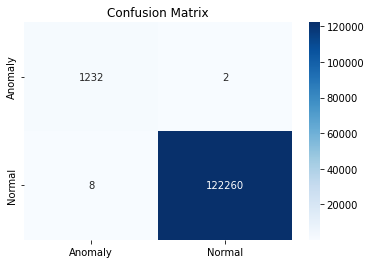


Feature Importances:
                                       Feature  Importance
1                            claim_status_Z005    0.310287
36                               cd_decision_P    0.116276
32                         part_number_des_-E3    0.112671
39                               item_type_MAT    0.099764
25                             claim_type_ZW06    0.053564
40                            total_work_hours    0.052452
4                            claim_status_Z012    0.045413
19                           claim_status_Z080    0.036824
11                           claim_status_Z030    0.027545
33                    part_number_des_-ECONOMY    0.021148
24                             claim_type_ZW01    0.016820
6                            claim_status_Z014    0.013494
26                        product_division_BUS    0.009599
3                            claim_status_Z011    0.009570
35                               cd_decision_D    0.009202
31                         part_nu

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


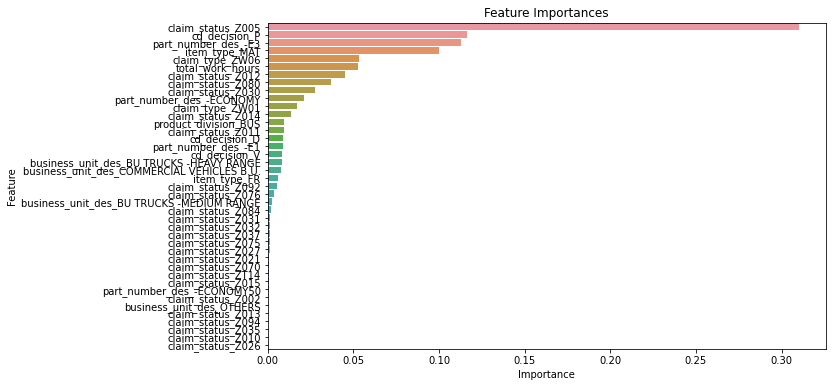

In [5]:
# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Exclude the 'anomaly' column
features = [col for col in numerical_columns if col != 'anomaly']

# Separate the features and the target variable
X = df[features]
y = df['anomaly']

# Split the data into training and test sets, maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title('Confusion Matrix')
plt.show()

# Feature importance analysis
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()



#### Distribution Plot

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

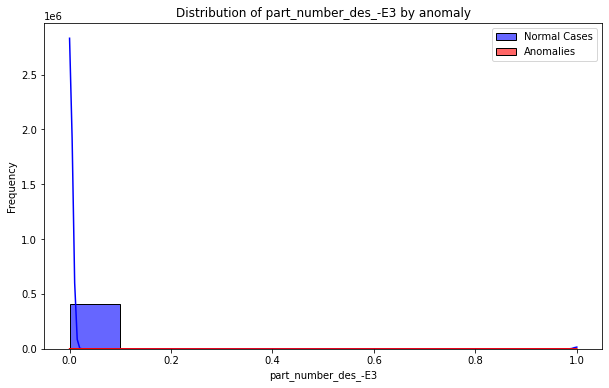

In [6]:
myutils.plot_overlayed_histograms(df,"part_number_des_-E3","anomaly")

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

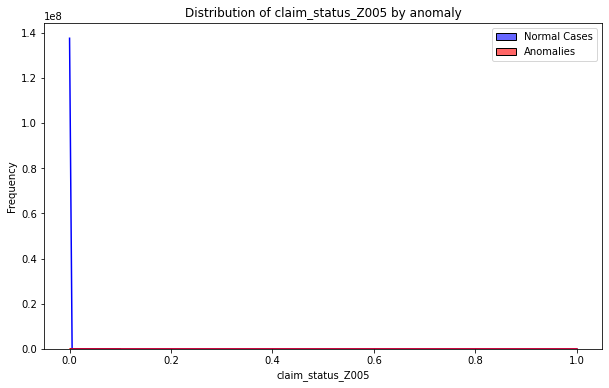

In [7]:
myutils.plot_overlayed_histograms(df,"claim_status_Z005","anomaly")

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

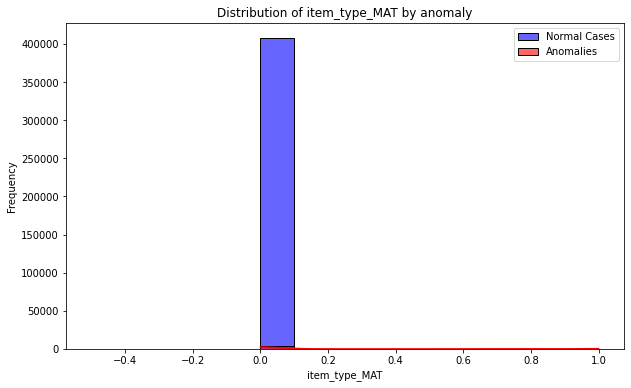

In [8]:
myutils.plot_overlayed_histograms(df,"item_type_MAT","anomaly")

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

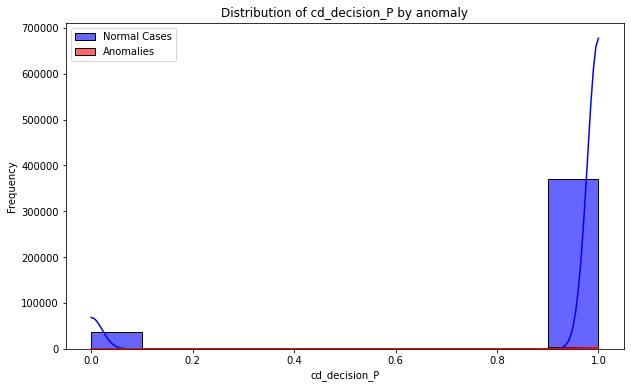

In [9]:
myutils.plot_overlayed_histograms(df,"cd_decision_P","anomaly") 

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

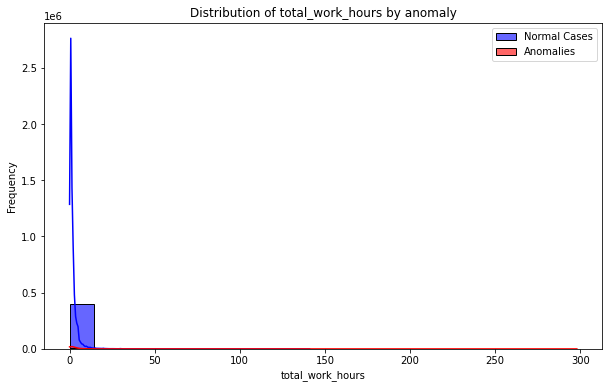

In [10]:
myutils.plot_overlayed_histograms(df,"total_work_hours","anomaly")

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

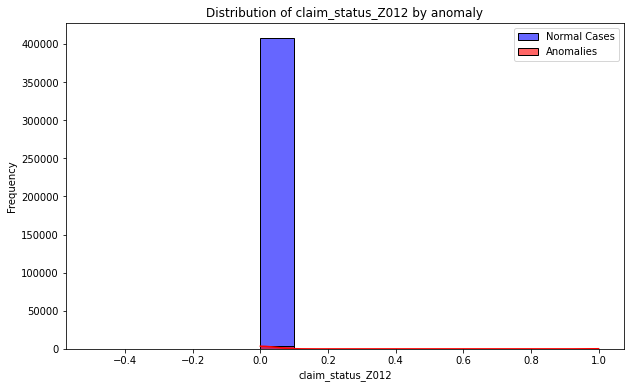

In [11]:
myutils.plot_overlayed_histograms(df,"claim_status_Z012","anomaly")

c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pagan133\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

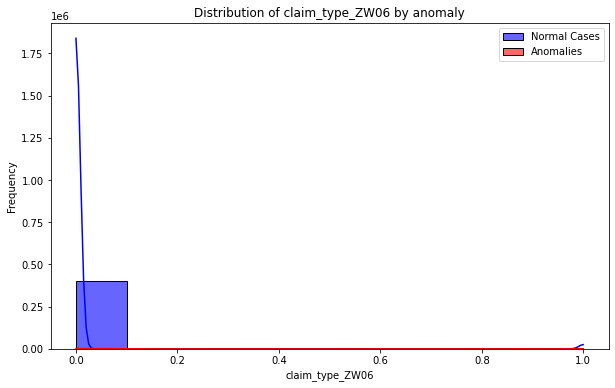

In [12]:
myutils.plot_overlayed_histograms(df,"claim_type_ZW06","anomaly")

In [13]:
# Filter the DataFrame for anomaly = -1
df_anomalies = df[df['anomaly'] == -1]

# Calculate the 75th and 95th percentiles for 'total_work_hours'
percentile_75 = df['total_work_hours'].quantile(0.75)
percentile_95 = df['total_work_hours'].quantile(0.95)

# Create a new column 'work_hours_category' based on the percentiles
df_anomalies['work_hours_category'] = df_anomalies['total_work_hours'].apply(
    lambda x: f'Between 0 and {percentile_75} hours' if x < percentile_75 
              else f'Between {percentile_75} and {percentile_95} hours' if x < percentile_95 
              else f'Greater than {percentile_95} hours'
)

# Group by the specified columns
grouped_df = df_anomalies.groupby(
    ['claim_type_ZW06', 'claim_status_Z012', 'item_type_MAT', 'cd_decision_P', 'claim_status_Z005', 'part_number_des_-E3', 'work_hours_category']
).size().reset_index(name='count')

# Display the result
grouped_df.sort_values('count', ascending=False)


C:\Users\pagan133\AppData\Local\Temp\ipykernel_1944\3193209897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anomalies['work_hours_category'] = df_anomalies['total_work_hours'].apply(


,claim_type_ZW06,claim_status_Z012,item_type_MAT,cd_decision_P,claim_status_Z005,part_number_des_-E3,work_hours_category,count
14,0,0,0,1,1,0,Between 0 and 2.0 hours,1206
44,1,0,0,1,0,1,Between 2.0 and 5.9 hours,528
22,0,0,1,1,0,0,Between 0 and 2.0 hours,395
15,0,0,0,1,1,0,Between 2.0 and 5.9 hours,326
11,0,0,0,1,0,1,Between 0 and 2.0 hours,291
32,0,1,0,1,0,0,Between 0 and 2.0 hours,143
43,1,0,0,1,0,1,Between 0 and 2.0 hours,139
8,0,0,0,1,0,0,Between 0 and 2.0 hours,128
12,0,0,0,1,0,1,Between 2.0 and 5.9 hours,115
0,0,0,0,0,0,0,Between 0 and 2.0 hours,100


From the analysis conducted, it has been highlighted that the values which most impact the anomaly are:
* claim_type = ZW06
* claim_status = Z012 (Claim in error policy (to be amended))
* item_type = MAT (Materiale)
* cd_decision = P (Pay)
* claim_status = Z005 (Claim cancelled/replaced)
* part_number_des = -E3
* work_hours_category -> typically, interventions are expected to take up to about 2 hours. Times exceeding 3 hours may indicate anomalous cases (not to be confused with necessarily long processes)

Some interesting and more frequent anomalous combinations
* cd_decision=Pay e claim_status= Claim cancelled/replaced
* claim_type = ZW06 - cd_decision=Pay - part_number_des = -E3 and work hours between i 2 and 6 hours
* item_type = Materiale - cd_decision=Pay - work hours between 0 and 2 hours

#### Improvements:

* Add domain considerations: For example, some cases should not be considered anomalous but are known error cases (e.g., Claim cancelled/replaced?)
* Add information to the Feature Engineering (FE): Include details about the part that caused the failure and its components.
* Test the Isolation Forest algorithm: Experiment with various parameters.
* Use DBScan: Cluster isolated points and, once the less dense clusters are identified, recognize anomalous behavior using their centroids or median values.